# Project 1: Test a Perceptual Phenomenon
*by Dieter Annys*

## Experiment description

> In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example **<span style="color:red">RED</span>**, **<span style="color:blue">BLUE</span>**. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example **<span style="color:green">PURPLE</span>**, **<span style="color:purple">ORANGE</span>**. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Question 1: What is our independent variable? What is our dependent variable?

- **Independent variable**: congruency of the word with its ink color
- **Dependent variable**: the time it takes to name the ink color [sec]

## Question 2: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

- **Null hypothesis**: there is no significant difference in time needed to read congruent words versus incongruent words
- **Alternative hypothesis**: there is a significant difference in time needed. 

Although my intuition says that the time needed for incongruent words will always tend to be higher than time needed for congruent words, I want to keep an open mind about the direction of the test and make no assumptions. I also don't favor any particular outcome, I am only interested in what the numbers say. That's why I will go for a **two-tailed test**.

Mathematically the hypothesis are the following:

$$H_0 \rightarrow \mu_{congruent} - \mu_{incongruent} = 0$$

$$H_A \rightarrow \mu_{congruent} - \mu_{incongruent} \ne 0$$

With $\mu_{congruent}$ and $\mu_{incongruent}$ being the population means for the congruent words condition and incongruent words respectively. This is because we use the samples to make hypotheses about the population, therefore the hypothesis is expressed in population parameters.

I will perform a **two-tailed t-test for two dependent samples**
- Two-tailed because I state no preference for direction of the alternative hypothesis
- t-test because I am comparing samples to eachother rather than to a population with known parameters
- The samples are **dependent** because it's the same group of subjects repeating the experiment
- I will test for a $\alpha$ level of 0.05, meaning a less than 5% chance the difference in sample means is due to chance

## Performing the Test

[Following this link](https://faculty.washington.edu/chudler/java/ready.html) I performed the test myself, with following results:

- Congruent condition: 15.362 s
- Incongruent condition: 29.435 s

## Importing the Provided Data

In [15]:
# Importing all necessary libraries for analysis
%matplotlib inline
import pandas as pd
import numpy as np
from math import sqrt, floor, ceil
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [16]:
# Importing the provided data into a pandas dataframe and displaying the top of the imported data.
stroopdata = pd.read_csv('stroopdata.csv')
stroopdata.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


## Question 3: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In an effort to not be lazy and test my understanding of the concepts, I'll limit my use of pandas builtin functions for the rest of the project, and do most calculations using pure Python.

In the following cells you will find:
1. Functions
2. Descriptive statistics for each sample independently
3. Descriptive statistics for the difference between the 2 samples, which I will use later to test my hypothesis

In [17]:
# Functions used
def get_mean(vals):
    n = len(vals)
    return sum(vals) / n

def get_median(vals):
    n = len(vals)
    if n % 2 == 0:
        return sum((sorted(vals))[n/2 - 1:n/2 + 1]) / 2
    return (sorted(vals))[(n - 1)/2]
        
def get_std(vals):
    n = len(vals)
    mean = get_mean(vals)
    return sqrt(sum([(val - mean)**2 for val in vals]) / (n - 1))

In [18]:
# Descriptive Statistics for each sample

# Sample size n
n = len(stroopdata.index)

# Get the values from the dataframe
congruent = stroopdata['Congruent'].values
incongruent = stroopdata['Incongruent'].values

# Descriptive Statistics
mean_c = get_mean(congruent)
median_c = get_median(congruent)
std_c = get_std(congruent)

mean_ic = get_mean(incongruent)
median_ic = get_median(incongruent)
std_ic = get_std(incongruent)

# Printing the stats
print("Sample size n\t %d" % n)
print("Stats for Congruent Words:")
print(" Mean\t %f" % mean_c)
print(" Median\t %f" % median_c)
print(" SD\t %f" % std_c)
print("Stats for Incongruent Words:")
print(" Mean\t %f" % mean_ic)
print(" Median\t %f" % median_ic)
print(" SD\t %f" % std_ic)

Sample size n	 24
Stats for Congruent Words:
 Mean	 14.051125
 Median	 14.356500
 SD	 3.559358
Stats for Incongruent Words:
 Mean	 22.015917
 Median	 21.017500
 SD	 4.797057


For both samples the mean and median are fairly equal, which suggests the data distribution is not skewed.

In [19]:
# Descriptive Statistics for the difference

# Generating a list of difference values
difference = [congruent[i] - incongruent[i] for i in range(n)]

# Descriptive Statistics
mean_diff = get_mean(difference)
median_diff = get_median(difference)
std_diff = get_std(difference)

# Printing the stats
print("Stats for the difference:")
print(" Mean\t %f" % mean_diff)
print(" Median\t %f" % median_diff)
print(" SD\t %f" % std_diff)

Stats for the difference:
 Mean	 -7.964792
 Median	 -7.666500
 SD	 4.864827


## Question 4: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  3.,  6.,
         3.,  3.,  2.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.]),
 array([  0.        ,   1.66666667,   3.33333333,   5.        ,
          6.66666667,   8.33333333,  10.        ,  11.66666667,
         13.33333333,  15.        ,  16.66666667,  18.33333333,
         20.        ,  21.66666667,  23.33333333,  25.        ,
         26.66666667,  28.33333333,  30.        ,  31.66666667,
         33.33333333,  35.        ,  36.66666667,  38.33333333,  40.        ]),
 <a list of 24 Patch objects>)

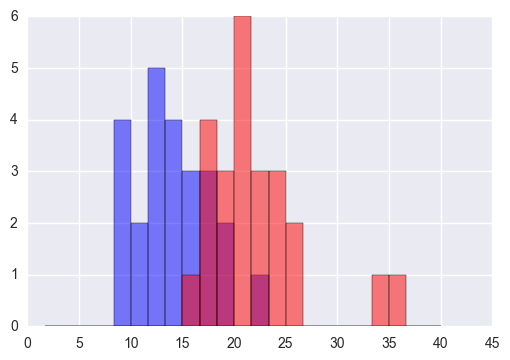

In [21]:
# Plotting a histogram for both samples

bins = 24
rng = [0, 40]

plt.hist(congruent, bins=bins, range=rng, fc=(0, 0, 1, 0.5))
plt.hist(incongruent, bins=bins, range=rng, fc=(1, 0, 0, 0.5))

In general both plots seem to have a similar shape, only shifted away from eachother. However, what strikes me as odd is the couple of values on their own on the high end of the x-axis.

I decide to check if these are outliers, by checking if they are higher than $Q_3 + 1.5 * IQR$.

In [22]:
# The value most likely to be an outlier is the maximum value in the series
max_ic = max(incongruent)

# Calculating the IQR. Knowing n = 24 I'm keeping it simple and not checking for evenness
q1 = get_median(sorted(incongruent)[:n/2])
q3 = get_median(sorted(incongruent)[n/2:])
iqr = q3 - q1
max_critical = q3 + iqr * 1.5

# Check if max is larger than max critical
if max_ic > max_critical:
    print("Value is an outlier")
else:
    print("Value is not an outlier")

Value is an outlier


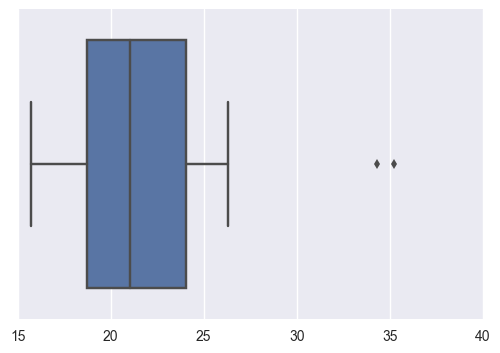

In [32]:
# Plotting a boxplot of the incongruent condition sample to show the outliers
sns.boxplot(incongruent)

In [23]:
# Checking amount of outliers
len([v for v in incongruent if v > max_critical])

2

There are 2 outliers. I want to see now how the descriptive statistics differ if I take out the outliers

In [24]:
congruent_no_outliers = [congruent[i] for i in range(len(congruent)) if incongruent[i] <= max_critical]
incongruent_no_outliers = [incongruent[i] for i in range(len(incongruent)) if incongruent[i] <= max_critical]

# Statistics
mean_c_no_outliers = get_mean(congruent_no_outliers)
median_c_no_outliers = get_median(congruent_no_outliers)
std_c_no_outliers = get_std(congruent_no_outliers)

mean_ic_no_outliers = get_mean(incongruent_no_outliers)
median_ic_no_outliers = get_median(incongruent_no_outliers)
std_ic_no_outliers = get_std(incongruent_no_outliers)

# Print
print("Stats for Congruent Words without outliers:")
print(" Mean\t %f" % mean_c_no_outliers)
print(" Median\t %f" % median_c_no_outliers)
print(" SD\t %f" % std_c_no_outliers)
print("Stats for Incongruent Words without outliers:")
print(" Mean\t %f" % mean_ic_no_outliers)
print(" Median\t %f" % median_ic_no_outliers)
print(" SD\t %f" % std_ic_no_outliers)

# Print previous stats
print("Stats for Congruent Words:")
print(" Mean\t %f" % mean_c)
print(" Median\t %f" % median_c)
print(" SD\t %f" % std_c)
print("Stats for Incongruent Words:")
print(" Mean\t %f" % mean_ic)
print(" Median\t %f" % median_ic)
print(" SD\t %f" % std_ic)

# Print differences
print("Differences in mean and SD for Congruent Words:")
print(mean_c - mean_c_no_outliers)
print(std_c - std_c_no_outliers)
print("Differences in mean and SD for Incongruent Words:")
print(mean_ic - mean_ic_no_outliers)
print(std_ic - std_ic_no_outliers)

Stats for Congruent Words without outliers:
 Mean	 13.939000
 Median	 14.356500
 SD	 3.592773
Stats for Incongruent Words without outliers:
 Mean	 20.856318
 Median	 20.820000
 SD	 2.876923
Stats for Congruent Words:
 Mean	 14.051125
 Median	 14.356500
 SD	 3.559358
Stats for Incongruent Words:
 Mean	 22.015917
 Median	 21.017500
 SD	 4.797057
Differences in mean and SD for Congruent Words:
0.112125
-0.0334150528248
Differences in mean and SD for Incongruent Words:
1.15959848485
1.92013462014


The following is a plot normal distributions of both samples, either with outliers, or without.

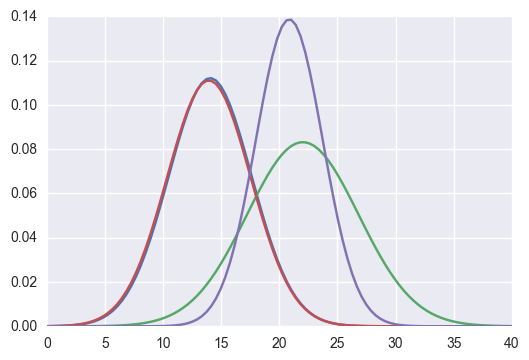

In [25]:
x = np.linspace(0, 40,100)
plt.plot(x,mlab.normpdf(x, mean_c, std_c))
plt.plot(x,mlab.normpdf(x, mean_ic, std_ic))
plt.plot(x,mlab.normpdf(x, mean_c_no_outliers, std_c_no_outliers))
plt.plot(x,mlab.normpdf(x, mean_ic_no_outliers, std_ic_no_outliers))

As you can see, the plot for the congruent words stays fairly unchanged. The incongruent words curve however changes quite a bit:
- The difference in means lowers
- The SD lowers as well, making the data look a lot more optimistic

**I decide the more conservative approach is still to continue with the complete dataset, including outliers.**

## Question 5: Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

- Degrees of freedom = 24 - 1 = 23
- $t_{critical}$ according to t-table for an $\alpha$ level of 0.05 (two-tailed) = +/- 2.069

In [26]:
SE = std_diff / sqrt(n)
t = mean_diff / SE
t

-8.020706944109957

As we can see, t is significantly lower than the critical value of -2.069

Using Graphpad we can determine the actual P value from this t, being P < 0.0001

I **reject the null hypothesis**

The time it takes to read incongruently colored words is significantly longer than the time for congruently colored words.

In [27]:
r_squared = t**2 / (t**2 + 23)
r_squared

0.73663641614450603

As a measure of effect size I calculated $r^2$ = 0.74, meaning 74% of the difference between the two means can be explained by the independent variable. This is very high.

## Question 6: Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

1. I think because different parts of the brain process the words differently, processing takes longer if two parts come to a different conclusion. If the 'left side' reads the word, and the 'right side' looks at the color, both will come up with a different answer in case of the incongruent words condition.

2. Maybe, measuring the amount of time it takes to get started rubbing your belly and tapping your head as opposed to rubbing both your belly and you head ;)

---

## Sources

The following is a list of all information I had to look up to complete this project

- http://daringfireball.net/projects/markdown/syntax: reference for markdown syntax in notebooks
- https://answers.squarespace.com/questions/35945/how-to-change-font-type-and-colour-for-a-few-words.html: how to change the color of words in the first section
- http://meta.math.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference: reference for using LaTeX symbols
- http://stackoverflow.com/questions/23447262/fitting-a-gaussian-to-a-histogram-with-matplotlib-and-numpy-wrong-y-scaling: when looking how to plot a normal distribution with matplotlib
- http://stackoverflow.com/questions/28398200/matplotlib-plotting-transparent-histogram-with-non-transparent-edge: when looking up how to make my histograms transparent as to visualize both samples in one plot